# EE 521
## Assignment 1
## Submitted By: Arshad Ali(214102301)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Continuous-time signals

## Basic Signals

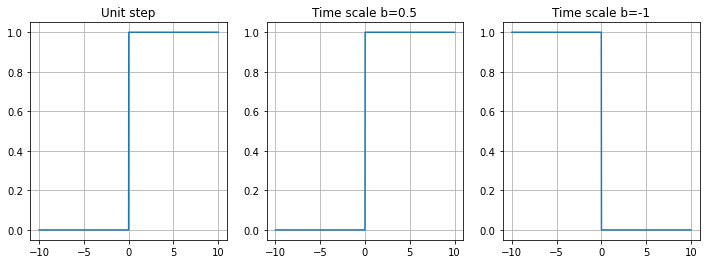

In [2]:
t = np.linspace(-10,10,2000)

# y(t) = ax(bt+c)
# Unit Step
def unit_step(t):
    if(t>=0):
        return 1
    else: 
        return 0
    

x11 = [unit_step(i) for i in t]
x12 = [unit_step(0.5*i) for i in t] # Time scaled by 0.5
x13 = [unit_step(-1*i) for i in t]  # Time scaled by -1


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(t,x11)
axes[0].set_title("Unit step")
axes[0].grid()

axes[1].plot(t,x12)
axes[1].set_title("Time scale b=0.5")
axes[1].grid()

axes[2].plot(t,x13)
axes[2].set_title("Time scale b=-1")
axes[2].grid()

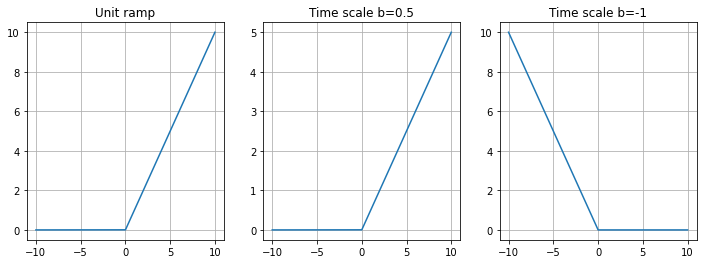

In [3]:
# Unit Ramp
def unit_ramp(t):
    if(t>=0):
        return t
    else:
        return 0
    
x21 = [unit_ramp(i) for i in t]
x22 = [unit_ramp(0.5*i) for i in t] # Time scaled by 0.5
x23 = [unit_ramp(-1*i) for i in t]  # Time scaled by -1

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(t,x21)
axes[0].set_title("Unit ramp")
axes[0].grid()

axes[1].plot(t,x22)
axes[1].set_title("Time scale b=0.5")
axes[1].grid()

axes[2].plot(t,x23)
axes[2].set_title("Time scale b=-1")
axes[2].grid()

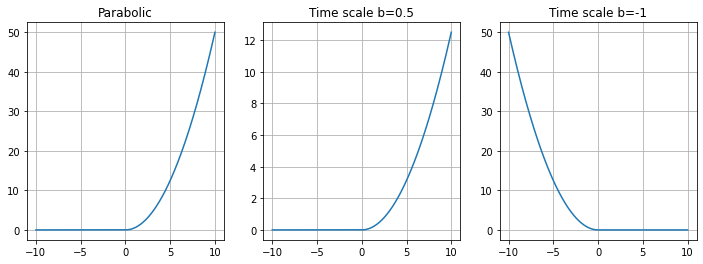

In [4]:
# Parabolic
def parabolic(t):
    if(t>=0):
        return t*t/2
    else:
        return 0
    
x31 = [parabolic(i) for i in t]
x32 = [parabolic(0.5*i) for i in t] # Time scaled by 0.5
x33 = [parabolic(-1*i) for i in t]  # Time scaled by -1

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(t,x31)
axes[0].set_title("Parabolic")
axes[0].grid()

axes[1].plot(t,x32)
axes[1].set_title("Time scale b=0.5")
axes[1].grid()

axes[2].plot(t,x33)
axes[2].set_title("Time scale b=-1")
axes[2].grid()

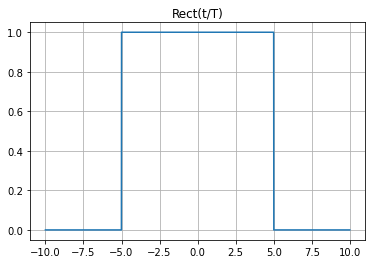

In [5]:
# Rectangular
# x4 = rect(t/T), T = 10

def rect(t,T):
    if(t<T/2 and t>-T/2):
        return 1
    else:
        return 0
    
x4 = [rect(i,10) for i in t]
plt.plot(t,x4)
plt.title("Rect(t/T)")
plt.grid()

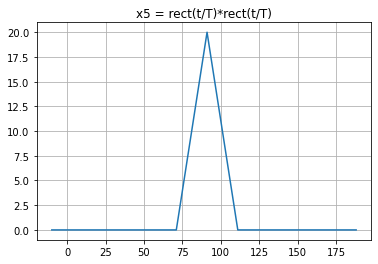

In [6]:
# x5 = rect(t/T)*rect(t/T)
def conv_func(x_n,h_n):
    l1 = len(x_n)
    l2 = len(h_n)
    n = l1 + l2 - 1
    
    y=np.zeros(n)
    
    for i in range(n):   
        for k in range(l1):
            if(i-k < 0 or  (i-k)>=l2):
                y[i] += 0
            else:
                y[i] += x_n[k]*h_n[i-k]
    return y

t = [i for i in np.arange(-5,5,0.1)]


x_rect = [rect(i,2) for i in t]
y5 = conv_func(x_rect,x_rect) # lies between [-10,10]
t5 = [i-10 for i in range(len(y5))]

plt.plot(t5,y5)
plt.title("x5 = rect(t/T)*rect(t/T)")
plt.grid()

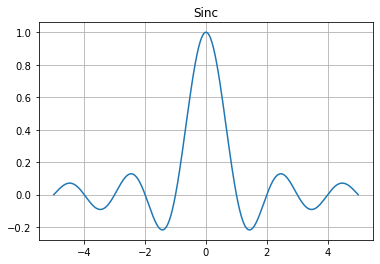

In [7]:
# Sinc
t6 = np.linspace(-5,5,1000)
def sinc(t):
    num = np.sin((np.pi)*t)
    den = (np.pi)*t
    return num/den

x6 = [sinc(i) for i in t6]
plt.plot(t6,x6)
plt.title("Sinc")
plt.grid()

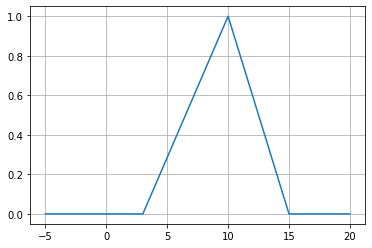

In [8]:
# x7  = 0    t<0
#     = (t-d1)/(d2-d1) d1<=t<=d2
#     = (d3-t)/(d3-d2) d2<=t<=d3
#     = 0    t>d3

d1,d2,d3 = 3,10,15
t7 = np.linspace(-5,20,2500)
x7 = [0 for i in range(800)] 
x7 += [(i-d1)/(d2-d1) for i in np.arange(d1,d2,0.01)]
x7 += [(d3-i)/(d3-d2) for i in np.arange(d2,d3,0.01)]
x7 += [0 for i in range(500)]
plt.plot(t7,x7)
plt.grid()

## Exponential Signals

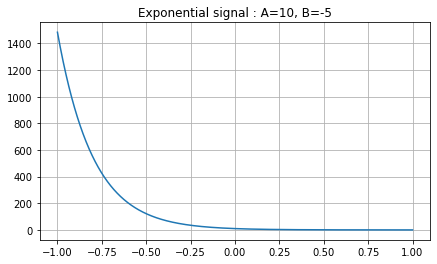

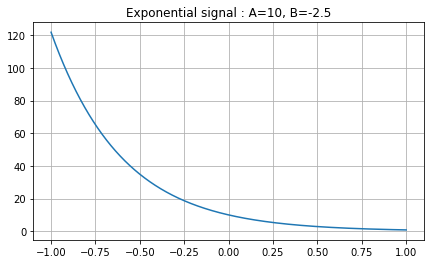

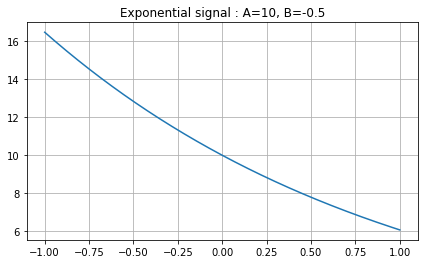

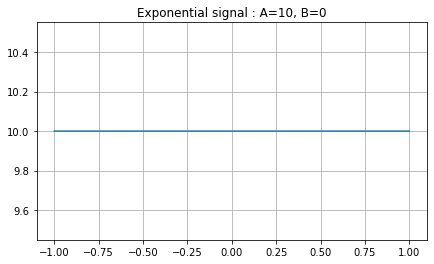

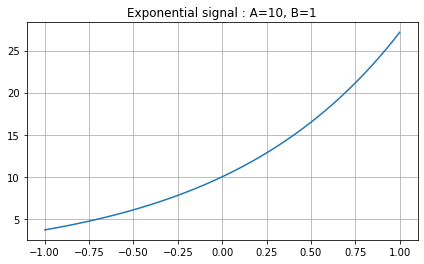

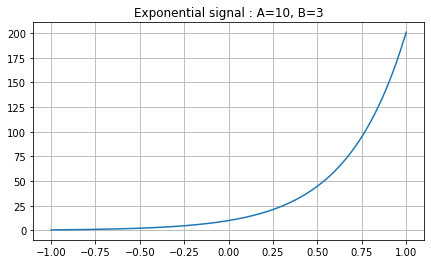

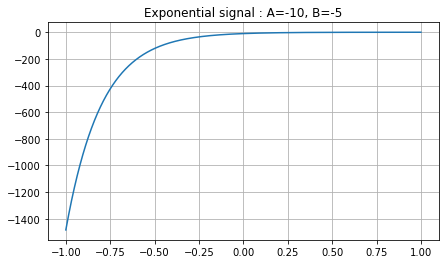

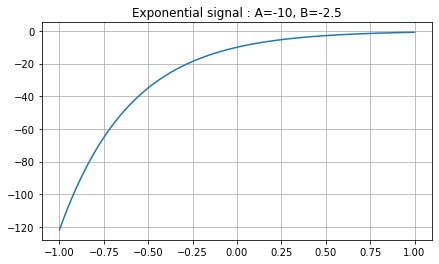

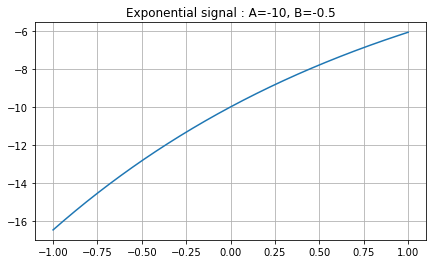

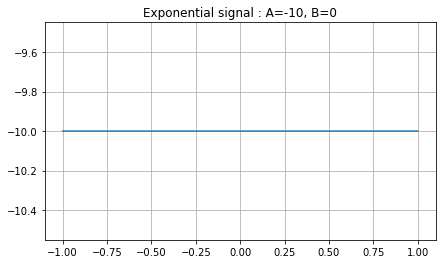

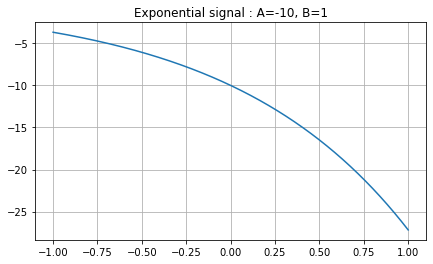

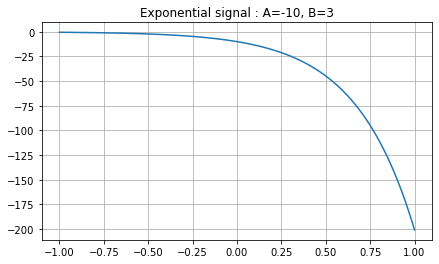

In [9]:
# x(t) = A*e^-Bt
A = [10,-10]
B = [-5,-2.5,-0.5,0,1,3]

t = np.linspace(-1,1,2000)
for a in A:
    for b in B:
        x=a*np.exp(b*t)
        plt.figure(figsize=(7,4))
        plt.plot(t,x)
        plt.title(f'Exponential signal : A={a}, B={b}')
        plt.grid()

## Complex Exponential Signals

<ipython-input-10-389e4da84dea>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,4))


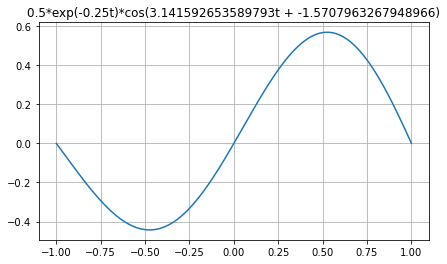

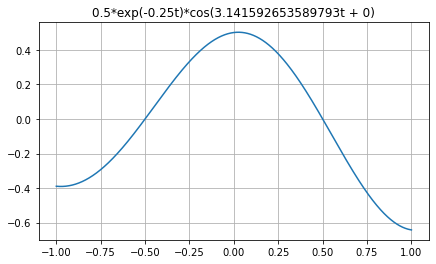

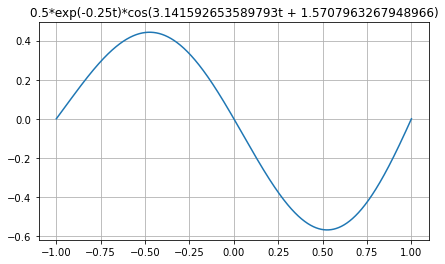

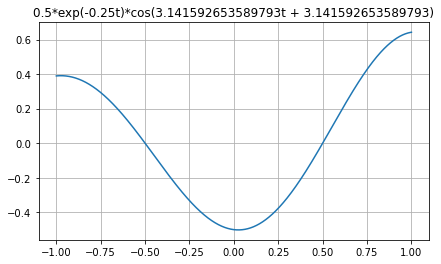

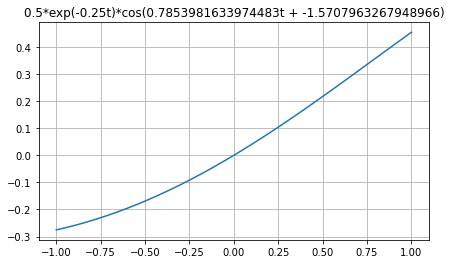

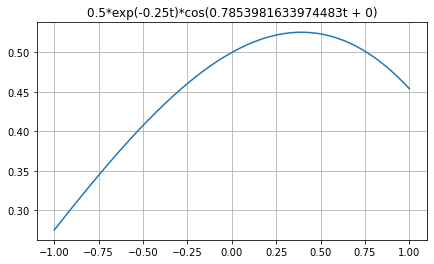

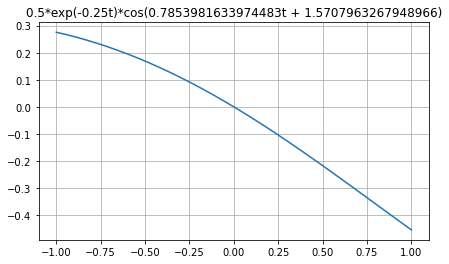

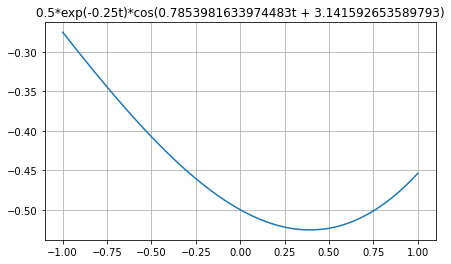

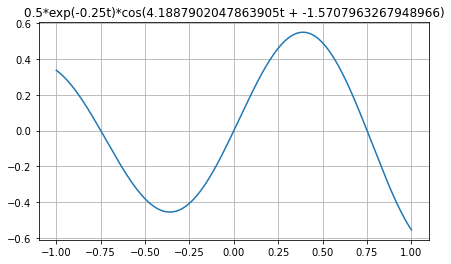

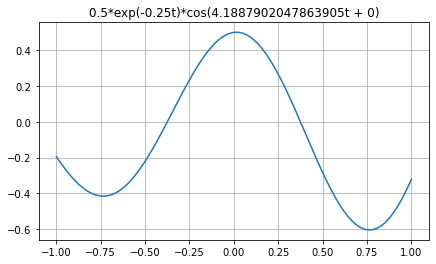

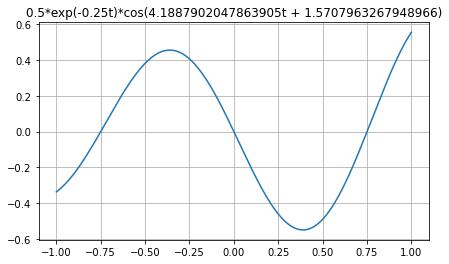

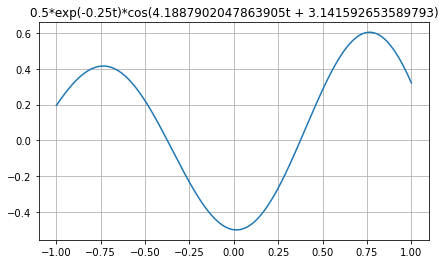

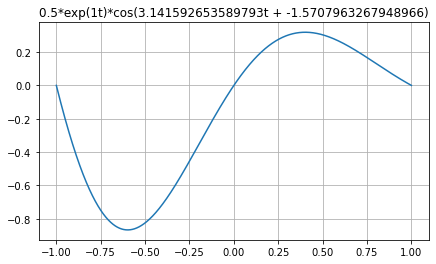

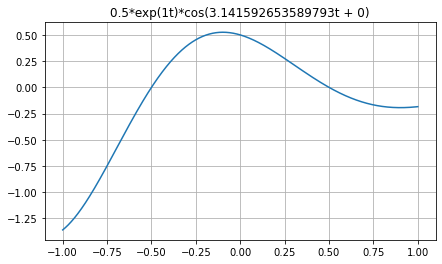

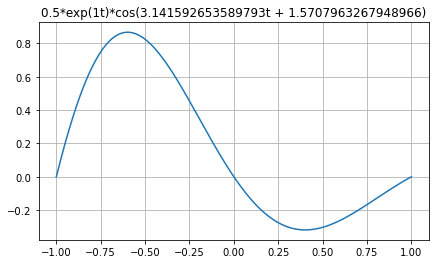

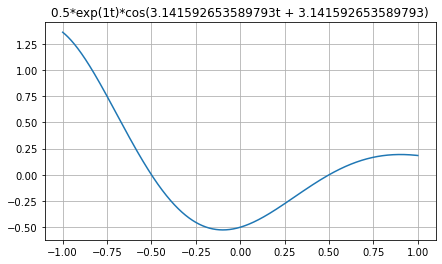

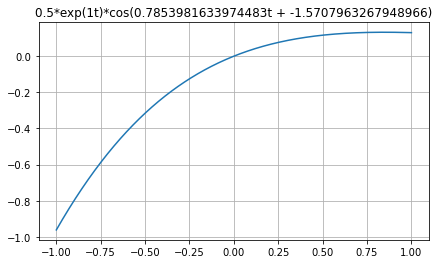

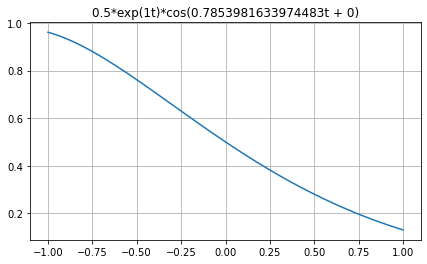

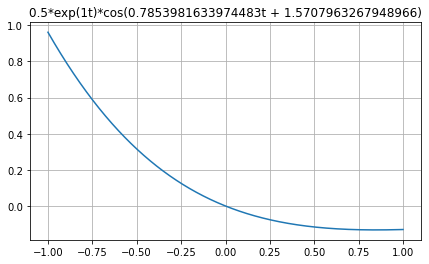

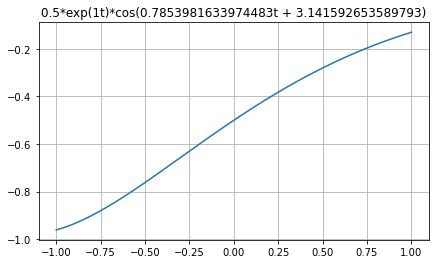

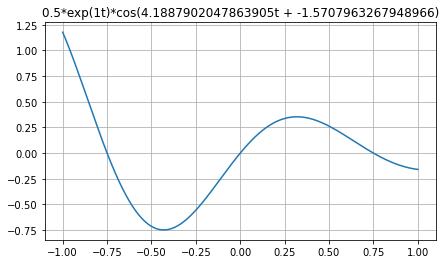

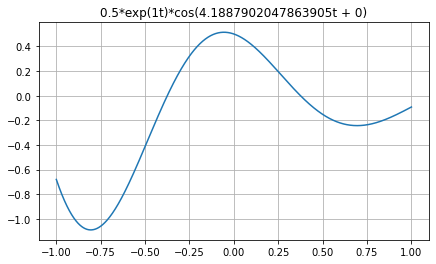

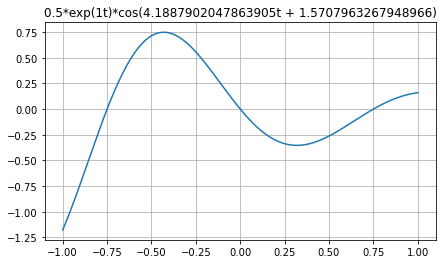

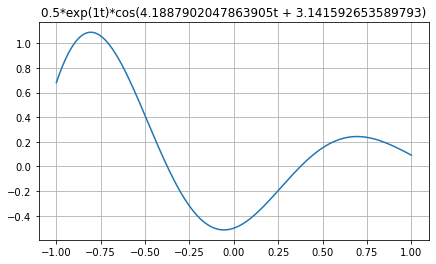

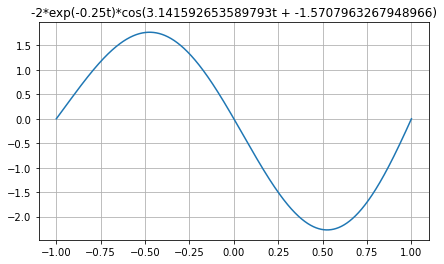

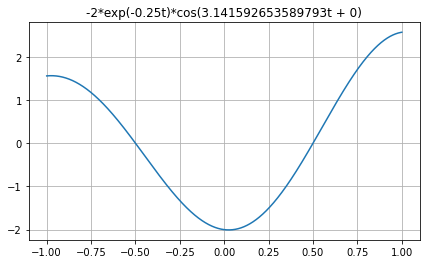

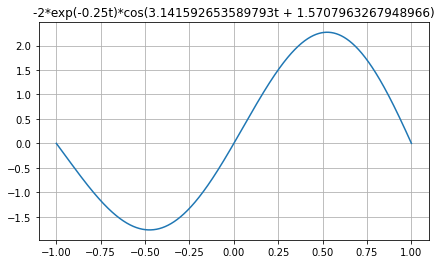

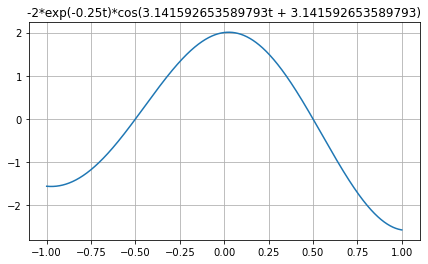

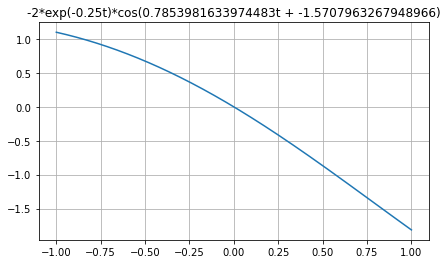

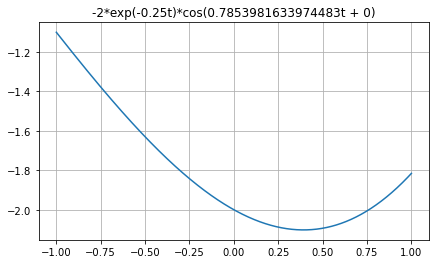

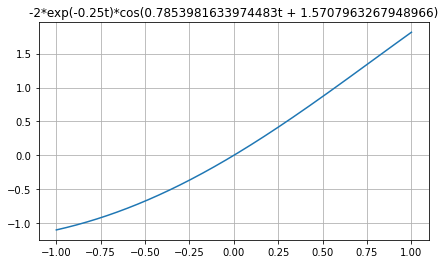

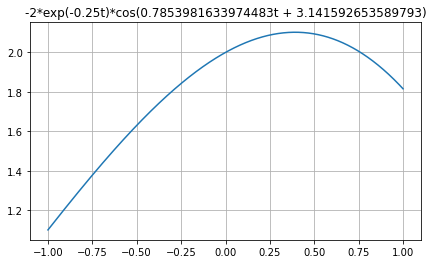

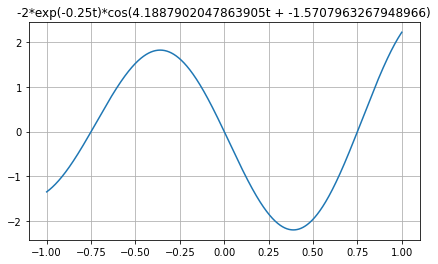

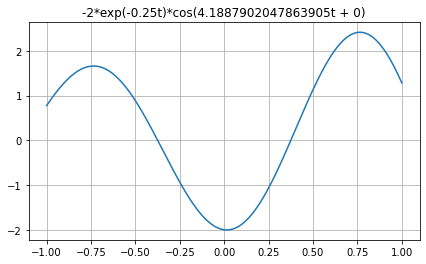

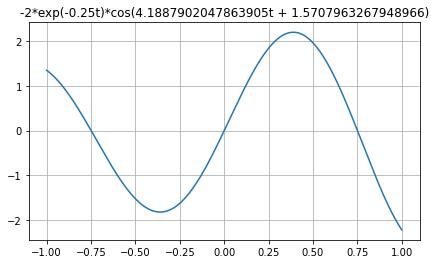

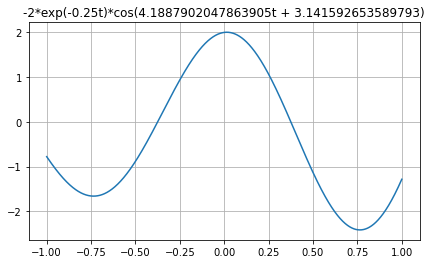

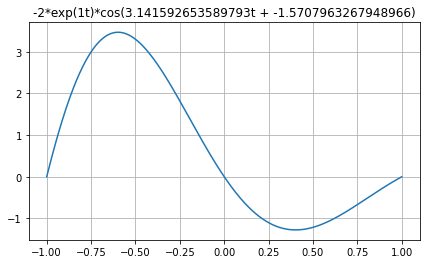

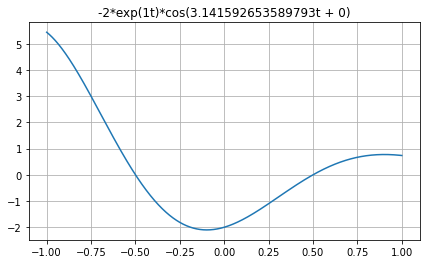

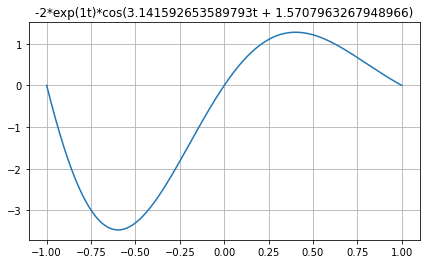

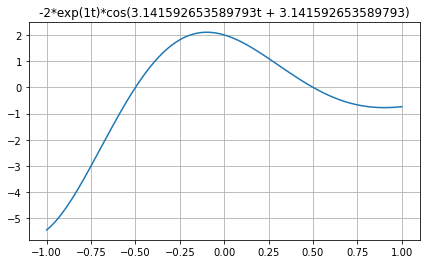

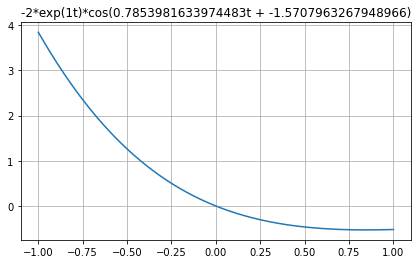

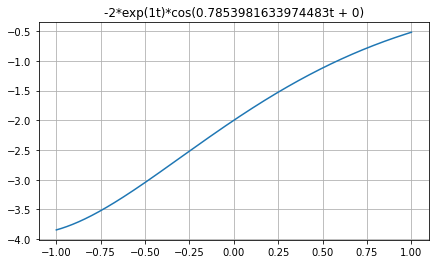

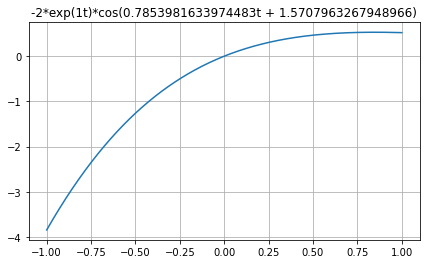

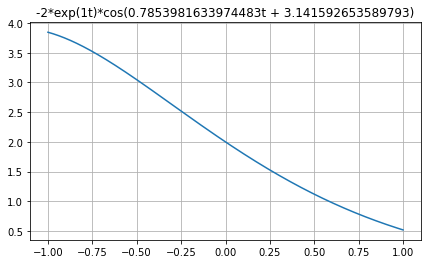

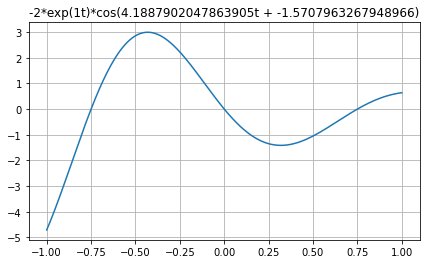

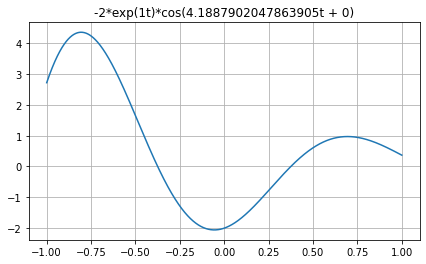

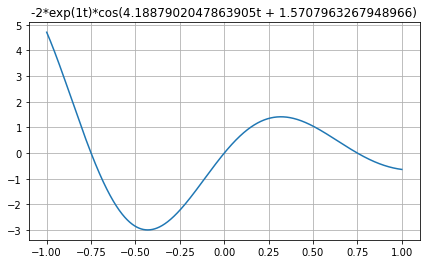

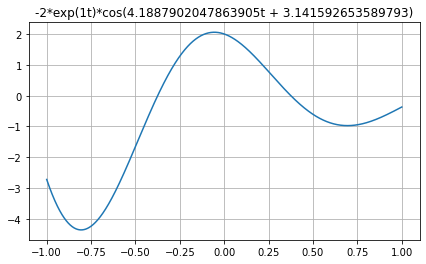

In [10]:
ALPHA = [0.5,-2]
BETA = [-0.25,1]
omega = [np.pi, np.pi/4, 4*np.pi/3]
PHI = [-np.pi/2, 0 ,np.pi/2, np.pi]

# y(t) = alpha*exp(-beta*t)* cos(wt + phi)
for alpha in ALPHA:
    for beta in BETA:
        for w in omega:
            for phi in PHI:
                x=alpha*np.exp(-beta*t)*np.cos(w*t + phi)
                plt.figure(figsize=(7,4))
                plt.plot(t,x)
                
                plt.title(f'{alpha}*exp({beta}t)*cos({w}t + {phi})')
                plt.grid()

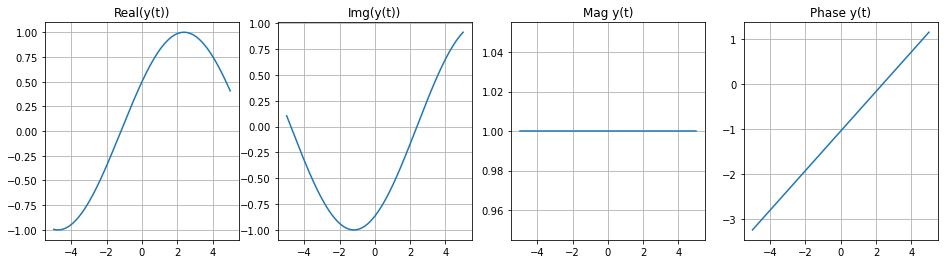

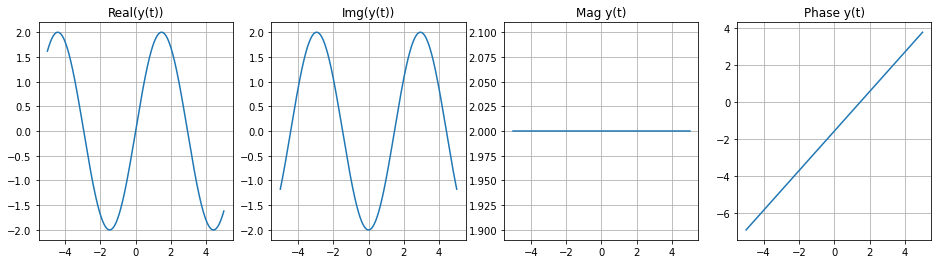

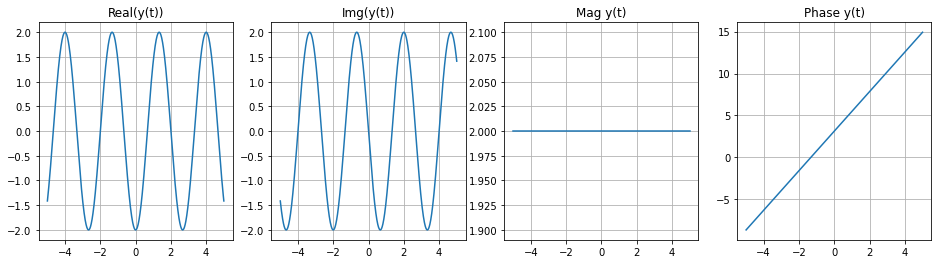

In [11]:
# y(t) = alpha*exp( j(wt+phi) )

alpha = [1,2,2]
omega = [0.14*np.pi, 0.34*np.pi, 0.75*np.pi]
phi = [(-1/3)*np.pi, (-1/2)*np.pi, np.pi]
t = np.linspace(-5,5,1000)

def real_y(t,a,w,p):
    return a*np.cos(w*t+p)
def img_y(t,a,w,p):
    return a*np.sin(w*t+p)
def mag_y(t,a,w,p):
    return a
def phase_y(t,a,w,p):
    return (w*t)+p

for i in range(3):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    a = alpha[i]
    w = omega[i]
    p = phi[i]
    
    real = [real_y(i,a,w,p) for i in t]
    img = [img_y(i,a,w,p) for i in t]
    mag = [mag_y(i,a,w,p) for i in t]
    phase = [phase_y(i,a,w,p) for i in t]
    
    axes[0].plot(t, real)
    axes[0].set_title("Real(y(t))")
    axes[0].grid()

    axes[1].plot(t,img)
    axes[1].set_title("Img(y(t))")
    axes[1].grid()
    
    axes[2].plot(t,mag)
    axes[2].set_title("Mag y(t)")
    axes[2].grid()
    
    axes[3].plot(t,phase)
    axes[3].set_title("Phase y(t)")
    axes[3].grid()
    



## Sinusoidal Signals

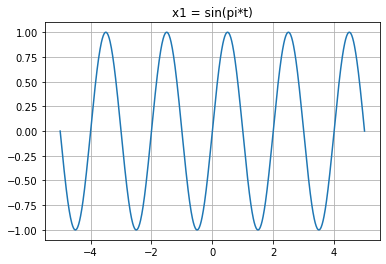

In [12]:
t = np.linspace(-5,5,1000)
# x1 = sin(pi*t)
x1 = np.sin(np.pi*t)
plt.plot(t,x1)
plt.title("x1 = sin(pi*t)")
plt.grid()

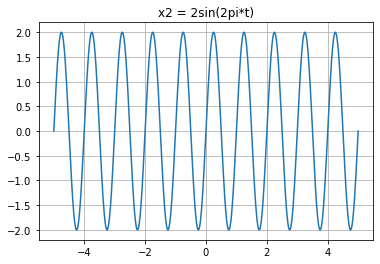

In [13]:
# x2 = 2sin(2pi*t)
x2 = 2*np.sin(2*np.pi*t)
plt.plot(t,x2)
plt.title("x2 = 2sin(2pi*t)")
plt.grid()

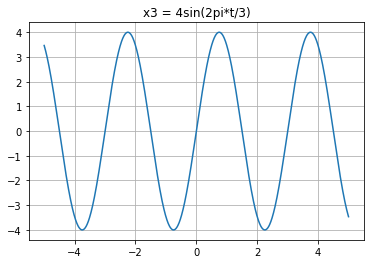

In [14]:
# x3 = 4sin(2pi*t/3)
x3 = 4*np.sin(2*np.pi*t/3)
plt.plot(t,x3)
plt.title("x3 = 4sin(2pi*t/3)")
plt.grid()

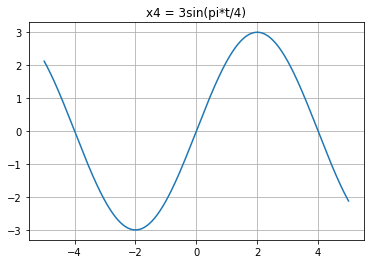

In [15]:
# x4 = 3sin(pi*t/4)
x4 = 3*np.sin(np.pi*t/4)
plt.plot(t,x4)
plt.title("x4 = 3sin(pi*t/4)")
plt.grid()

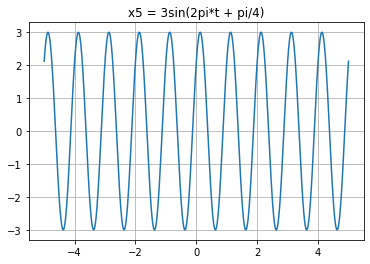

In [16]:
# x5 = 3sin(2pi*t + pi/4)
x5 = 3*np.sin(2*np.pi*t + np.pi/4)
plt.plot(t,x5)
plt.title("x5 = 3sin(2pi*t + pi/4)")
plt.grid()

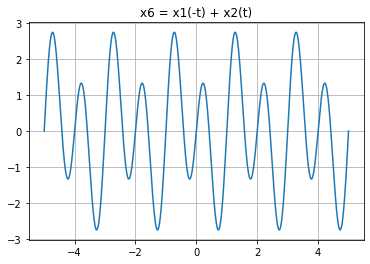

In [17]:
# x6 = x1(-t) + x2(t)
x6 = np.sin(-np.pi*t) + 2*np.sin(2*np.pi*t)
plt.plot(t,x6)
plt.title("x6 = x1(-t) + x2(t)")
plt.grid()

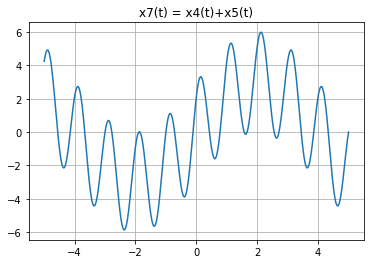

In [18]:
x7 = x4 + x5
plt.plot(t,x7)
plt.title("x7(t) = x4(t)+x5(t)")
plt.grid()

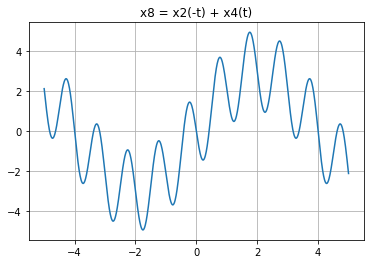

In [19]:
# x8 = x2(-t) + x4(t)
x8 = 2*np.sin(-2*np.pi*t) + 3*np.sin(np.pi*t/4)
plt.plot(t,x8)
plt.title("x8 = x2(-t) + x4(t)")
plt.grid()


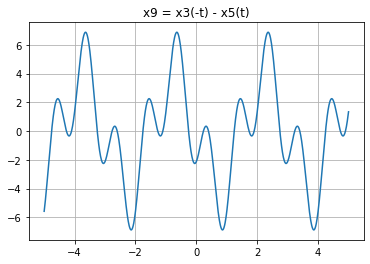

In [20]:
# x9 = x3(-t) - x5(t)
x9 = 4*np.sin(-2*np.pi*t/3) - 3*np.sin(-2*np.pi*t + np.pi/4)
plt.plot(t,x9)
plt.title("x9 = x3(-t) - x5(t)")
plt.grid()

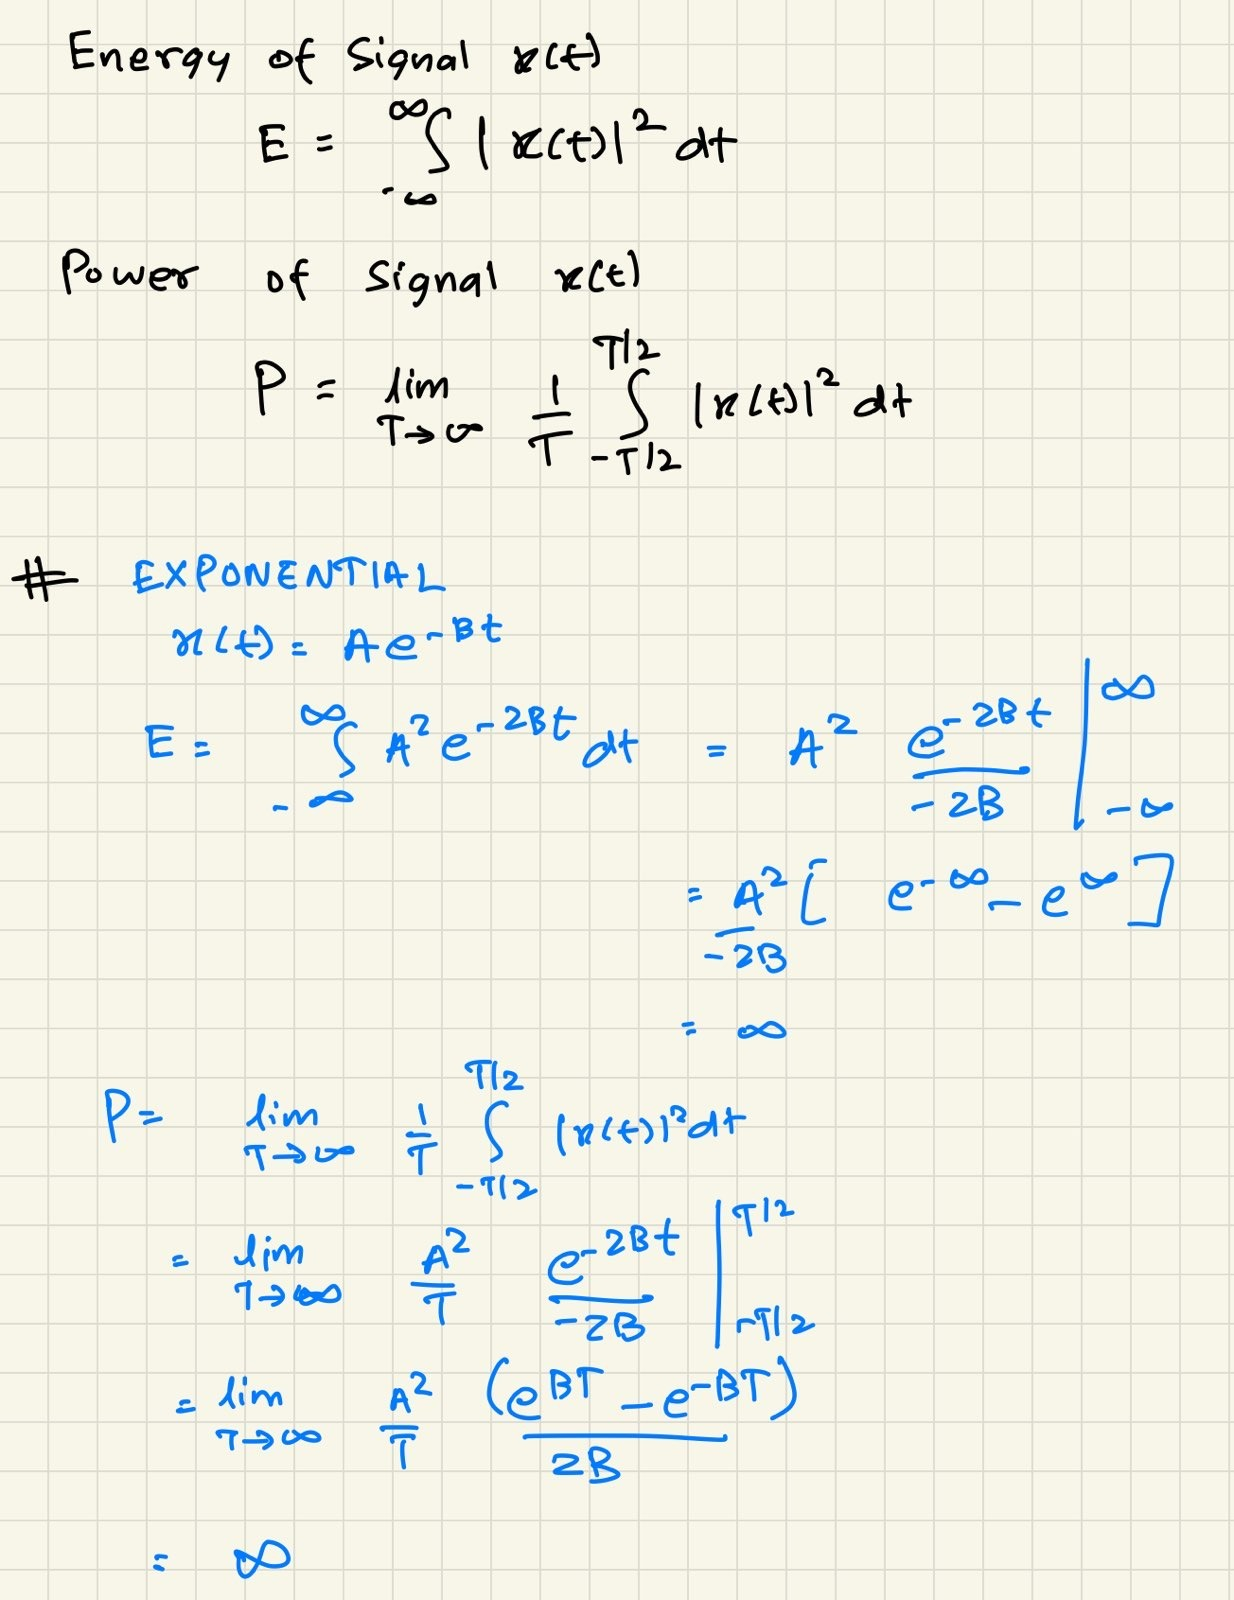

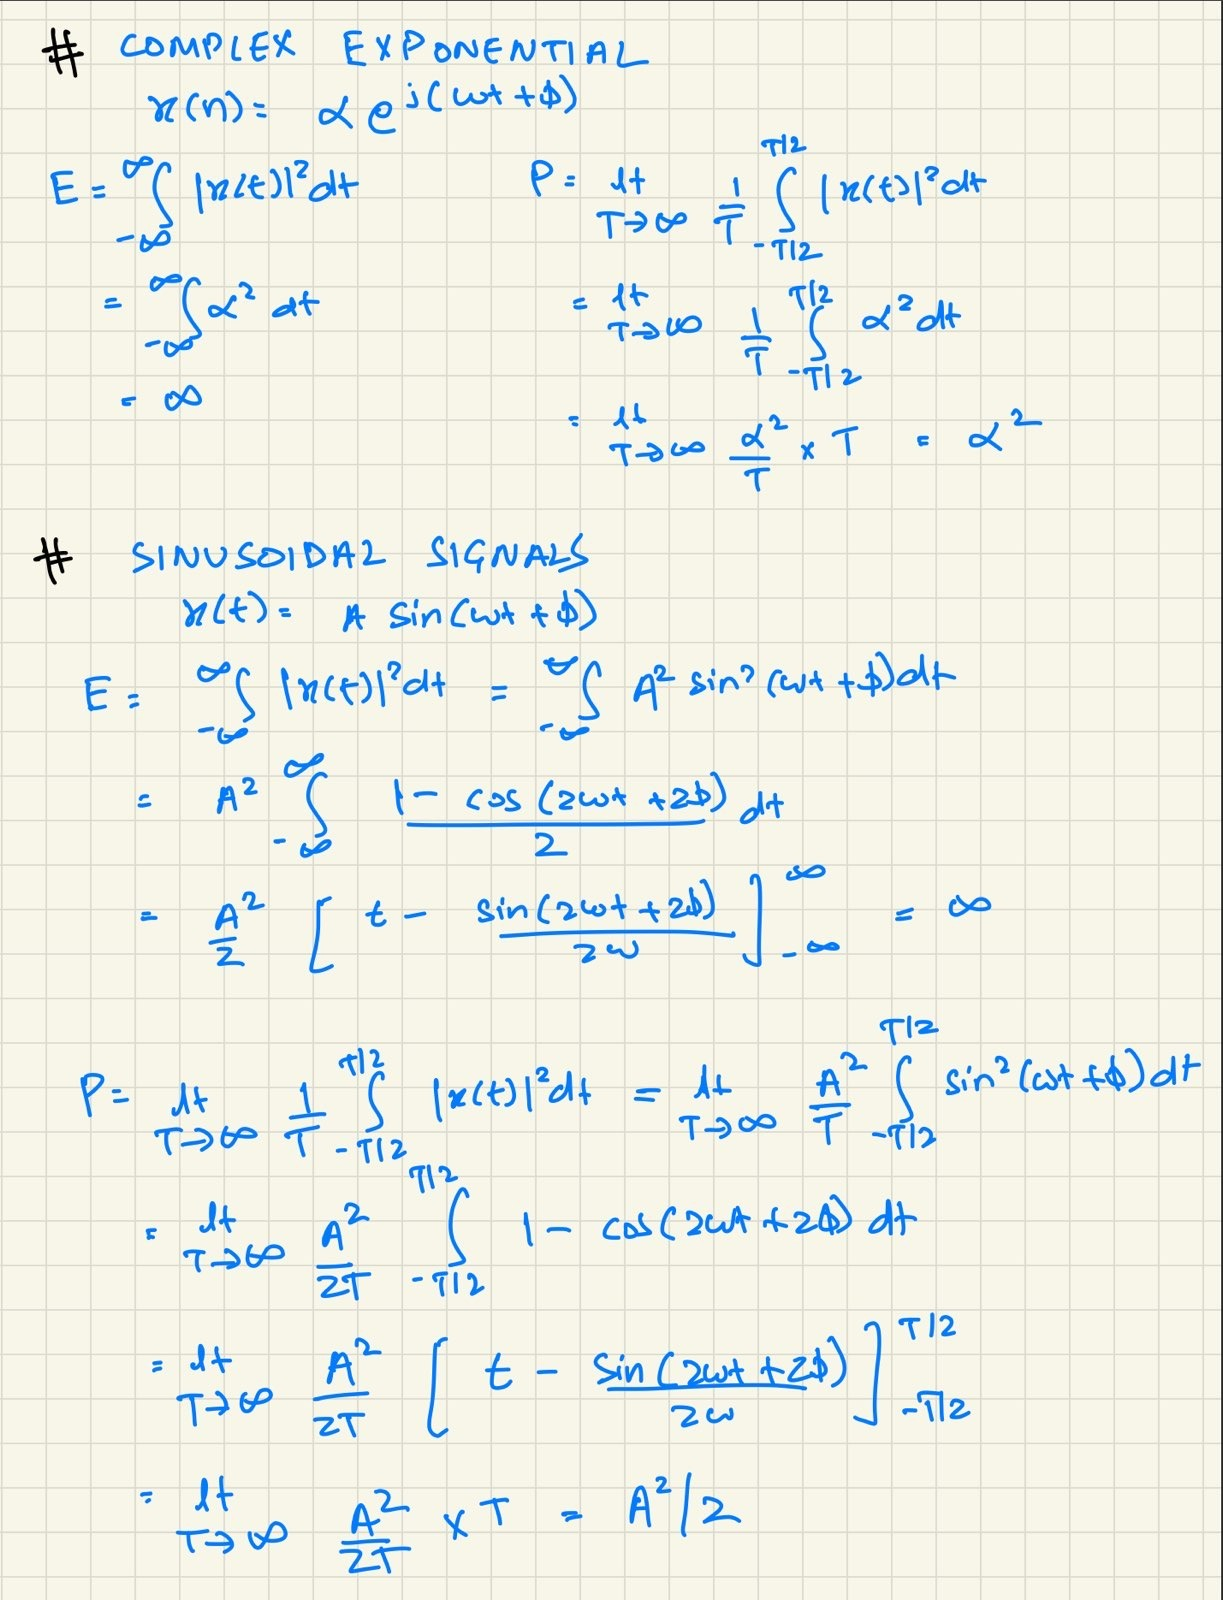

# 2. Discrete-time Signals

## 2.1

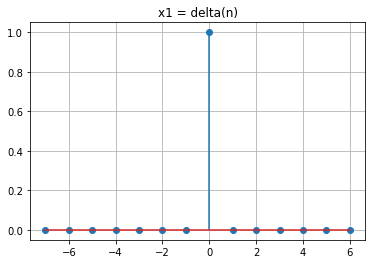

In [21]:
n = np.arange(-7,7)

def x1_fn(n):
    # x1 = delta(n)
    if(n==0):
        return 1
    else:
        return 0
x1 = [x1_fn(i) for i in n]
plt.stem(n,x1) 
plt.title("x1 = delta(n)")
plt.grid()

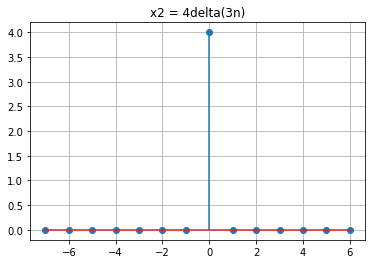

In [22]:
def x2_fn(n):
    # x2 = 4delta(3n)
    if(n==0):
        return 4
    else:
        return 0
x2 = [x2_fn(i) for i in n]
plt.stem(n,x2)   
plt.title("x2 = 4delta(3n)")
plt.grid()

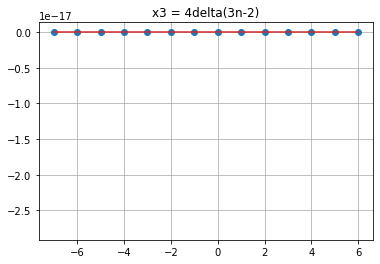

In [23]:
def x3_fn(n):
    # x3 = 4delta(3n-2)
    return 0

x3 = [x3_fn(i) for i in n]
plt.stem(n,x3) 
plt.title("x3 = 4delta(3n-2)")
plt.grid()

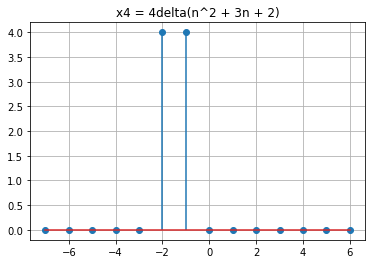

In [24]:
def x4_fn(n):
    # x4 = 4delta(n^2 + 3n + 2) = 4delta((n+2)(n+1))
    if(n==-2 or n==-1):
        return 4
    else:
        return 0
x4 = [x4_fn(i) for i in n]
plt.stem(n,x4)   
plt.title("x4 = 4delta(n^2 + 3n + 2)")
plt.grid()

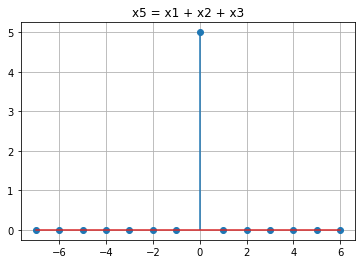

In [25]:
x5 = [x1[i]+x2[i]+x3[i] for i in range(len(x1))]
plt.stem(n,x5)
plt.title("x5 = x1 + x2 + x3")
plt.grid()

<StemContainer object of 3 artists>

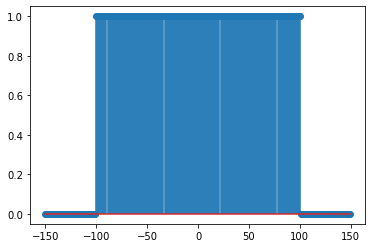

In [26]:
n6 = np.arange(-150,150)
def x6_fn(n):
    # x6 = delta(n-k) for k (-100,100)
    if(n<=100 and n>=-100):
        return 1
    else:
        return 0
x6 = [x6_fn(i) for i in n6]
plt.stem(n6,x6)

## 2.2

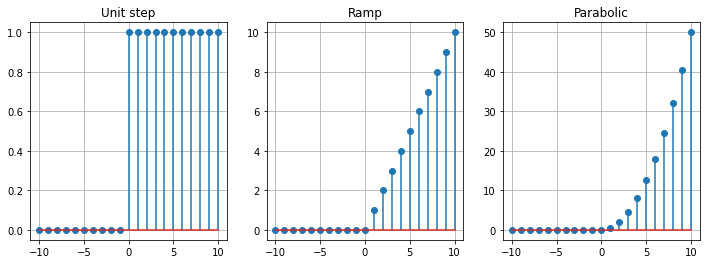

In [27]:
t = np.arange(-10,11)

# y(t) = ax(bt+c)

def unit_step(t):
    if(t>=0):
        return 1
    else: 
        return 0
    
def unit_ramp(t):
    if(t>=0):
        return t
    else:
        return 0
    
def parabolic(t):
    if(t>=0):
        return t*t/2
    else:
        return 0

x1 = [unit_step(i) for i in t]
x2 = [unit_ramp(i) for i in t]
x3 = [parabolic(i) for i in t]


fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].stem(t,x1)
axes[0].set_title("Unit step")
axes[0].grid()

axes[1].stem(t,x2)
axes[1].set_title("Ramp")
axes[1].grid()

axes[2].stem(t,x3)
axes[2].set_title("Parabolic")
axes[2].grid()


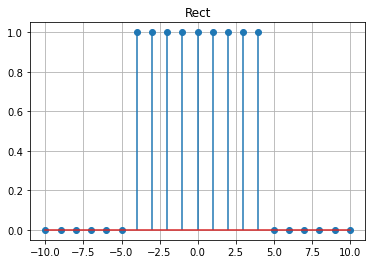

In [28]:
def rect(t,T):
    if(t<T/2 and t>-T/2):
        return 1
    else:
        return 0
    
x4 = [rect(i,10) for i in t]
plt.stem(t,x4)
plt.title("Rect")
plt.grid()

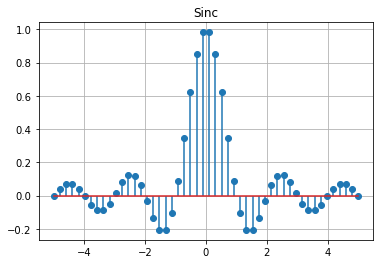

In [29]:
t = np.linspace(-5,5)
def sinc(t):
    num = np.sin((np.pi)*t)
    den = (np.pi)*t
    return num/den

x = [sinc(i) for i in t]
plt.stem(t,x)
plt.title("Sinc")
plt.grid()

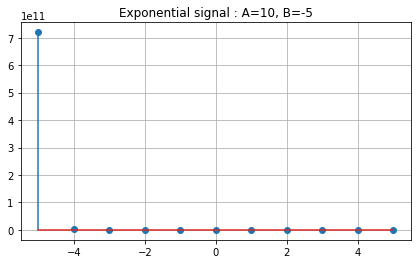

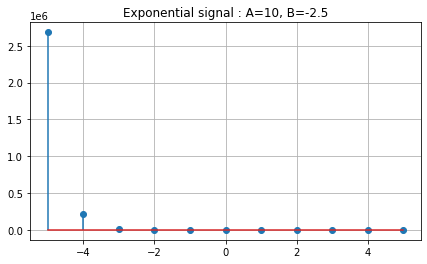

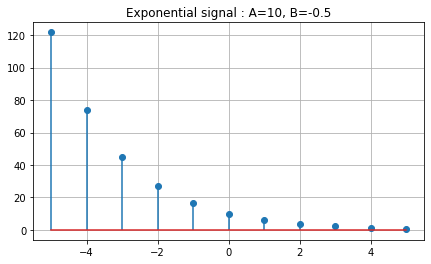

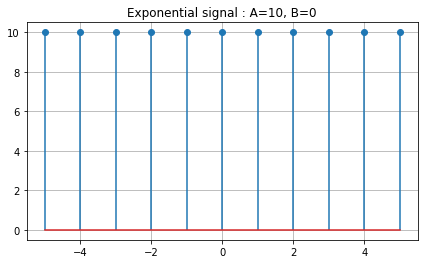

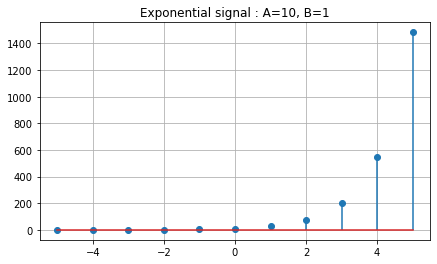

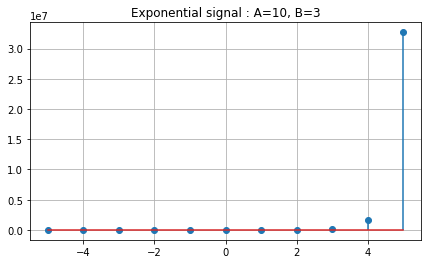

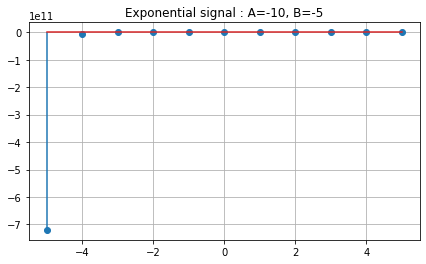

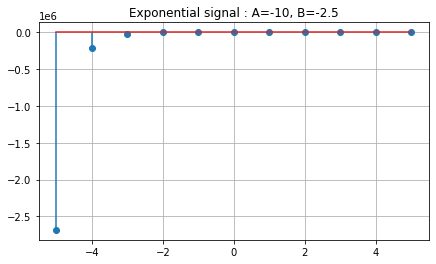

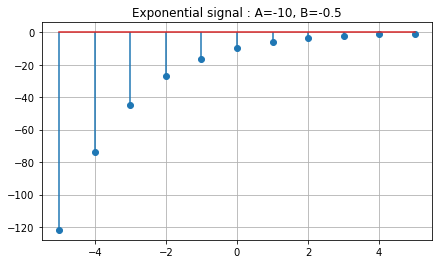

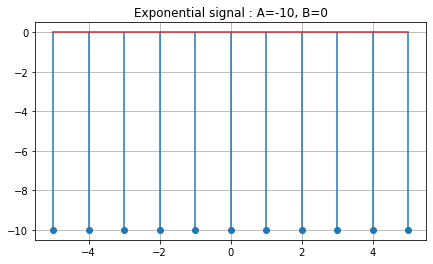

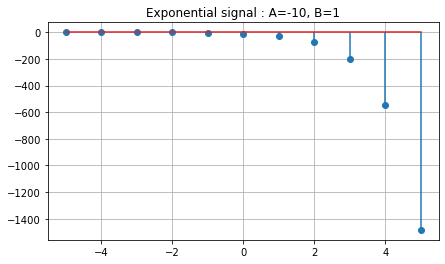

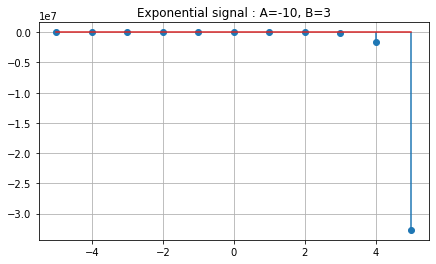

In [30]:
# x(n) = A*e^-B*n
A = [10,-10]
B = [-5,-2.5,-0.5,0,1,3]

t = np.arange(-5,6)
for a in A:
    for b in B:
        x=a*np.exp(b*t)
        plt.figure(figsize=(7,4))
        plt.stem(t,x)
        plt.title(f'Exponential signal : A={a}, B={b}')
        plt.grid()

<ipython-input-31-db6bf2592780>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,4))


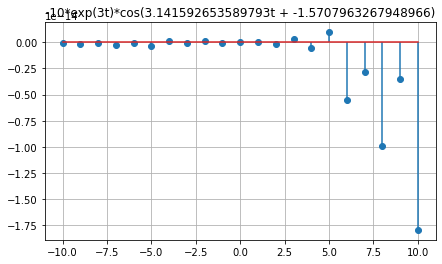

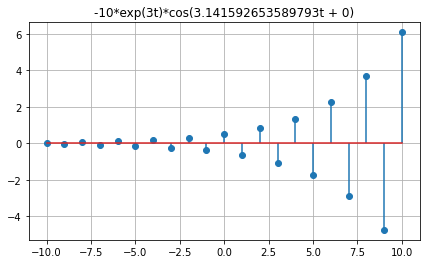

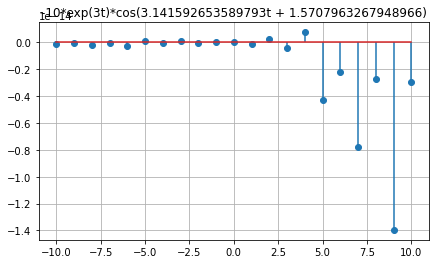

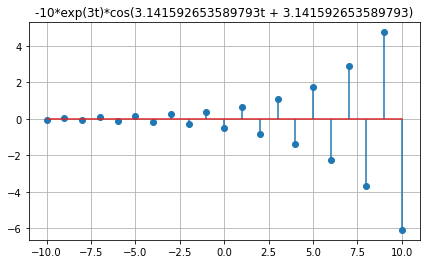

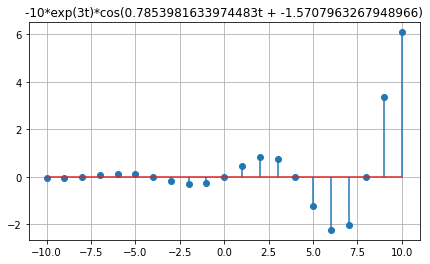

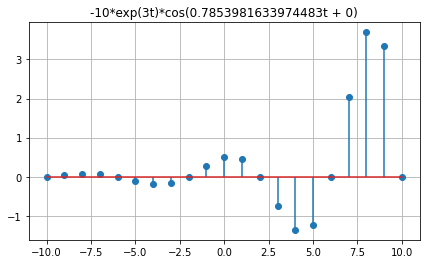

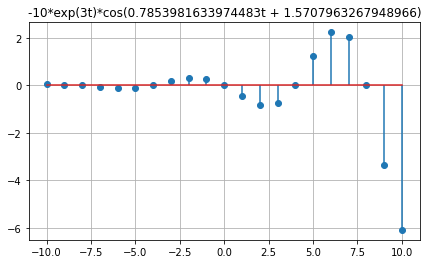

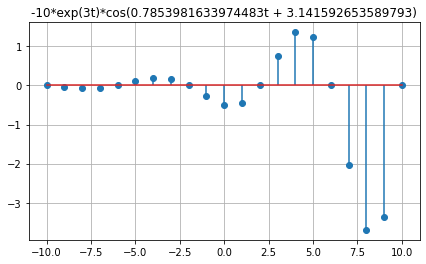

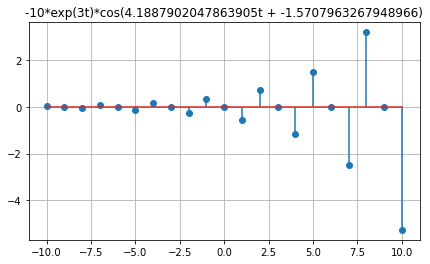

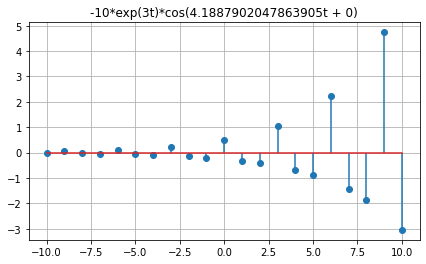

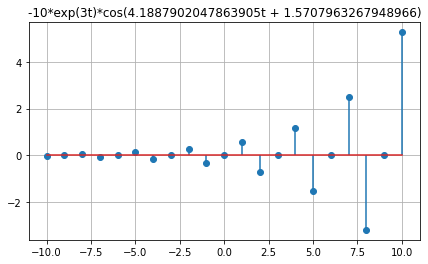

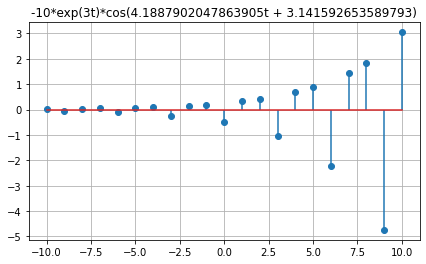

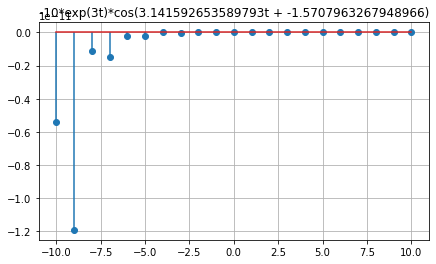

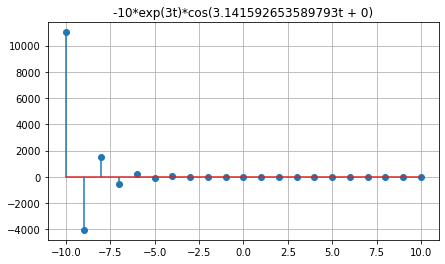

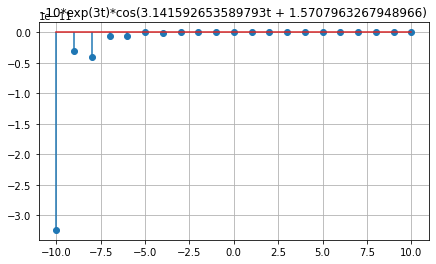

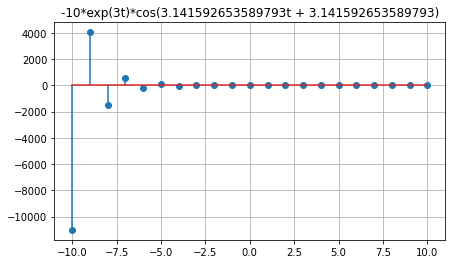

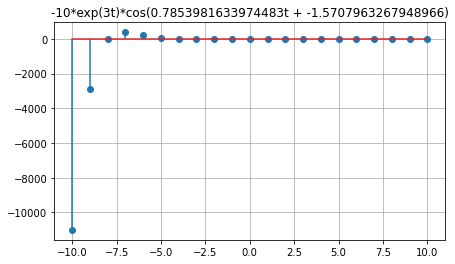

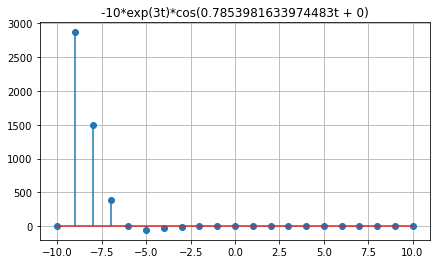

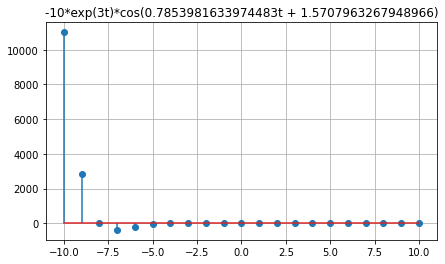

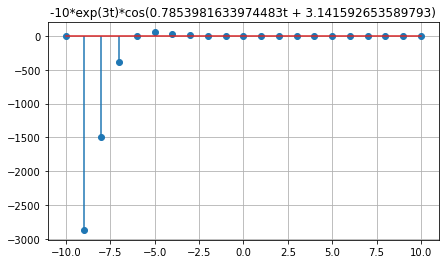

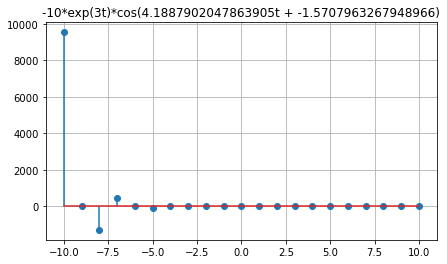

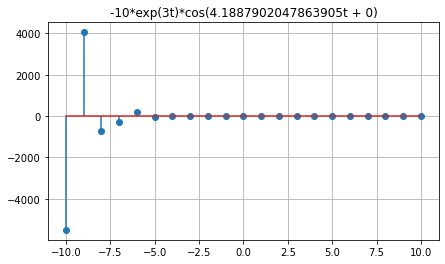

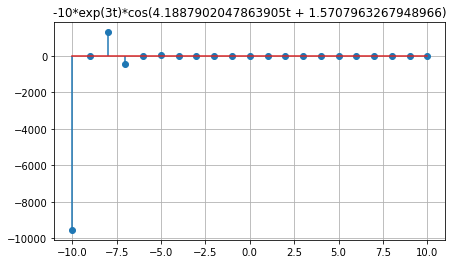

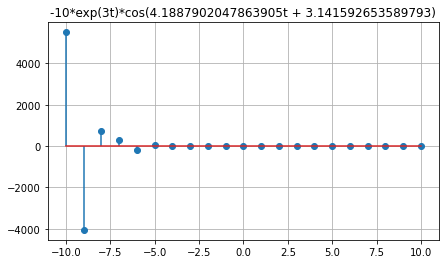

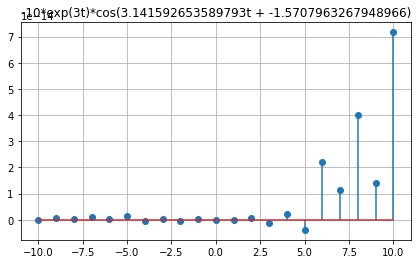

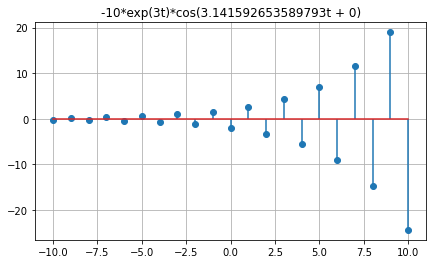

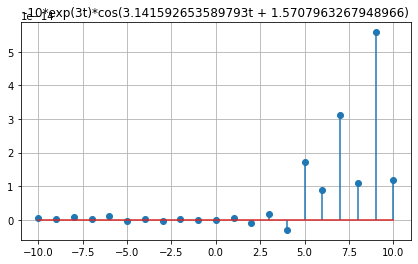

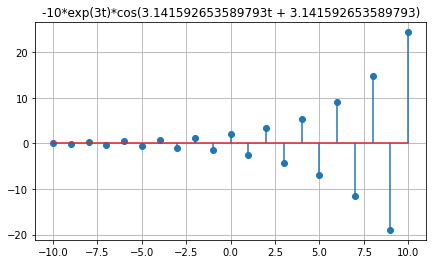

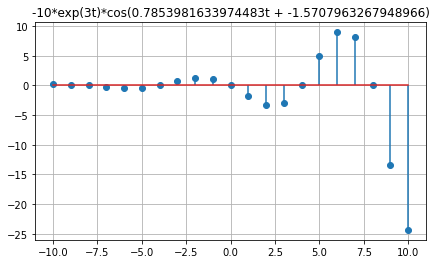

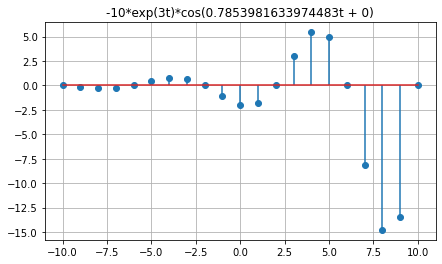

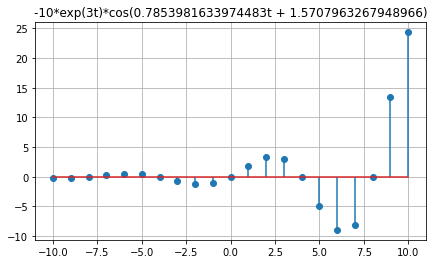

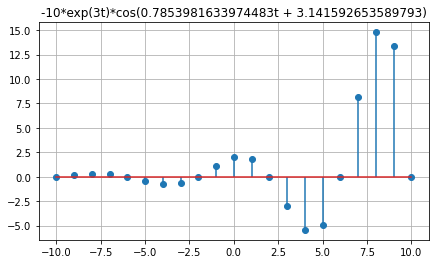

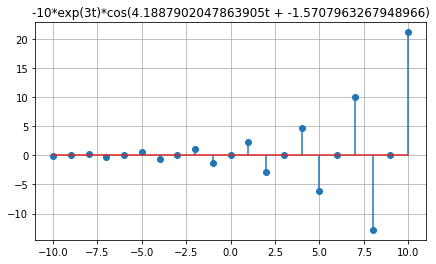

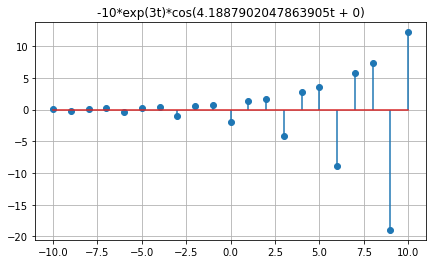

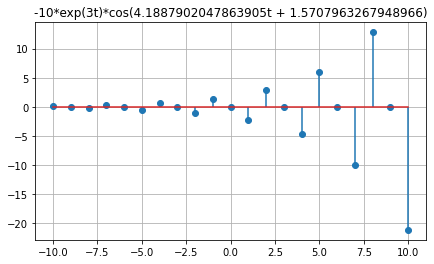

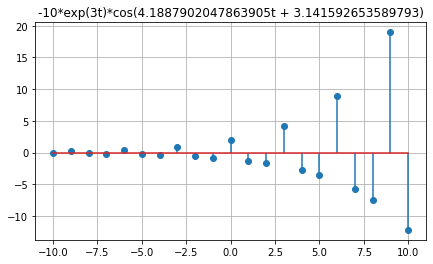

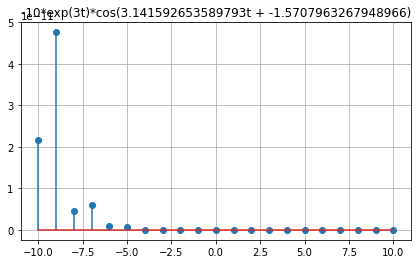

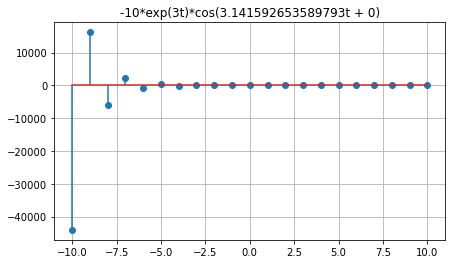

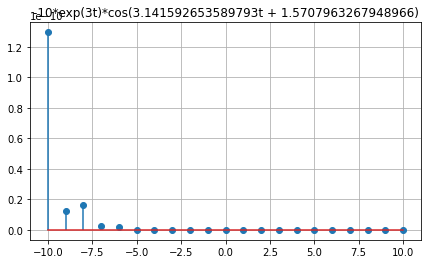

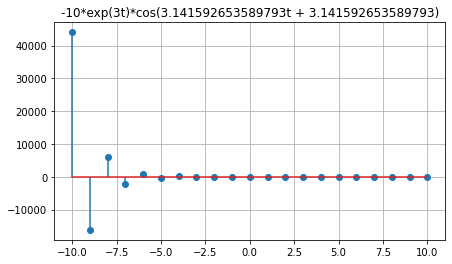

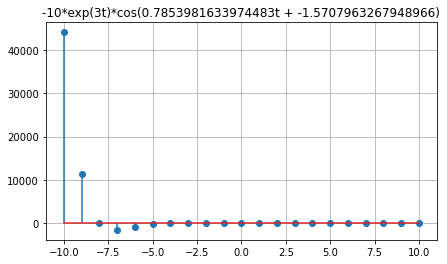

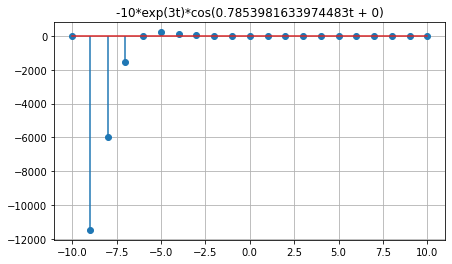

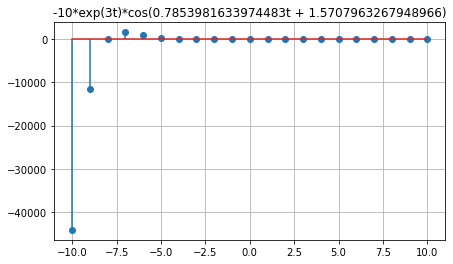

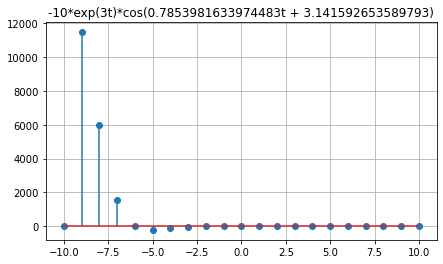

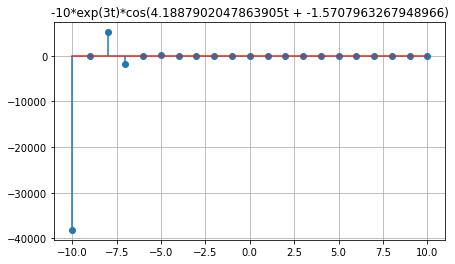

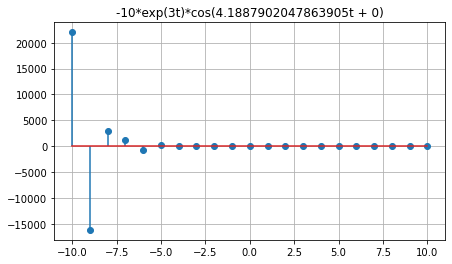

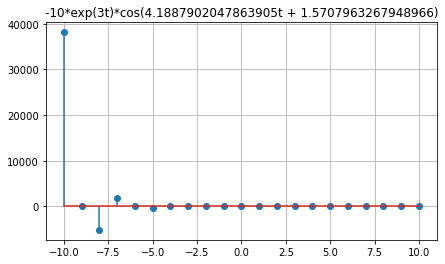

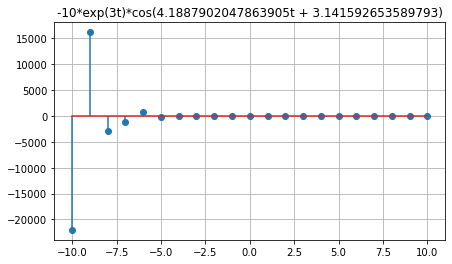

In [31]:
ALPHA = [0.5,-2]
BETA = [-0.25,1]
omega = [np.pi, np.pi/4, 4*np.pi/3]
PHI = [-np.pi/2, 0 ,np.pi/2, np.pi]

# y(t) = alpha*exp(-beta*t)* cos(wt + phi)
t = np.arange(-10,11)
for alpha in ALPHA:
    for beta in BETA:
        for w in omega:
            for phi in PHI:
                x=alpha*np.exp(-beta*t)*np.cos(w*t + phi)
                plt.figure(figsize=(7,4))
                plt.stem(t,x)
                
                plt.title(f'{a}*exp({b}t)*cos({w}t + {phi})')
                plt.grid()

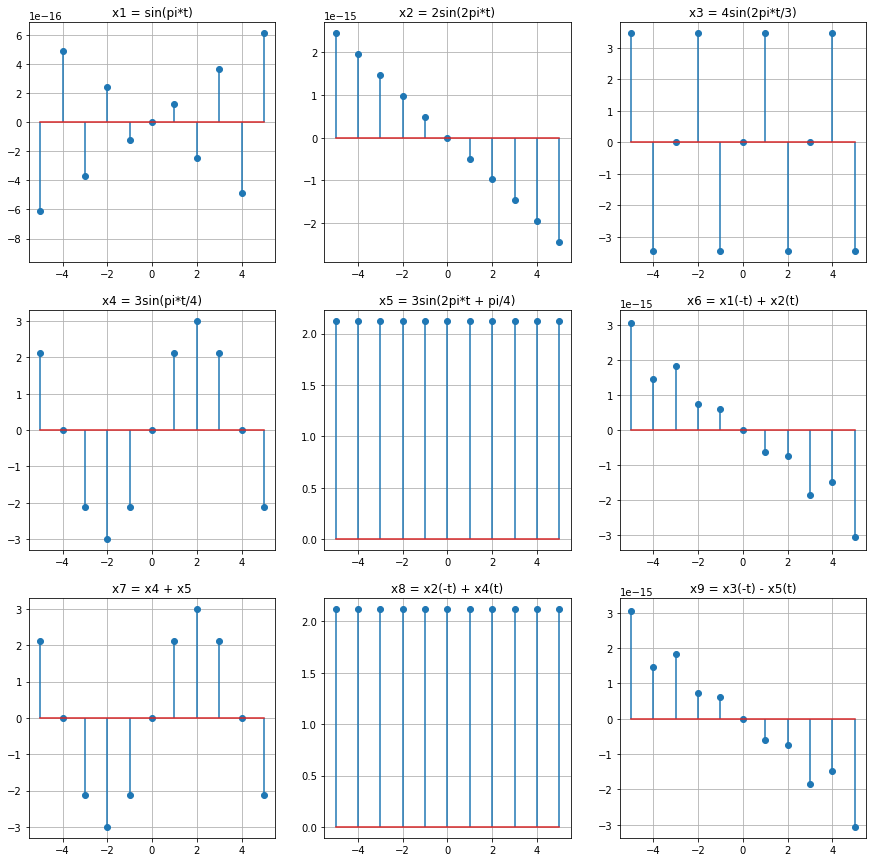

In [32]:
t = np.arange(-5,6)

# x1 = sin(pi*t)
x1 = np.sin(np.pi*t)

# x2 = 2sin(2pi*t)
x2 = 2*np.sin(2*np.pi*t)

# x3 = 4sin(2pi*t/3)
x3 = 4*np.sin(2*np.pi*t/3)

# x4 = 3sin(pi*t/4)
x4 = 3*np.sin(np.pi*t/4)

# x5 = 3sin(2pi*t + pi/4)
x5 = 3*np.sin(2*np.pi*t + np.pi/4)

# x6 = x1(-t) + x2(t)
x6 = np.sin(-np.pi*t) + 2*np.sin(2*np.pi*t)

x7 = x4 + x5

# x8 = x2(-t) + x4(t)
x8 = 2*np.sin(-2*np.pi*t) + 3*np.sin(np.pi*t/4)

# x9 = x3(-t) - x5(t)
x9 = 4*np.sin(-2*np.pi*t/3) - 3*np.sin(-2*np.pi*t + np.pi/4)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes[0][0].stem(t,x1)
axes[0][0].set_title("x1 = sin(pi*t)")
axes[0][0].grid()
axes[0][1].stem(t,x2)
axes[0][1].set_title("x2 = 2sin(2pi*t)")
axes[0][1].grid()
axes[0][2].stem(t,x3)
axes[0][2].set_title("x3 = 4sin(2pi*t/3)")
axes[0][2].grid()

axes[1][0].stem(t,x4)
axes[1][0].set_title("x4 = 3sin(pi*t/4)")
axes[1][0].grid()
axes[1][1].stem(t,x5)
axes[1][1].set_title("x5 = 3sin(2pi*t + pi/4)")
axes[1][1].grid()
axes[1][2].stem(t,x6)
axes[1][2].set_title("x6 = x1(-t) + x2(t)")
axes[1][2].grid()

axes[2][0].stem(t,x4)
axes[2][0].set_title("x7 = x4 + x5")
axes[2][0].grid()
axes[2][1].stem(t,x5)
axes[2][1].set_title("x8 = x2(-t) + x4(t)")
axes[2][1].grid()
axes[2][2].stem(t,x6)
axes[2][2].set_title("x9 = x3(-t) - x5(t)")
axes[2][2].grid()






## 2.3

In discrete time domain, delta,ramp and parabolic functions are related using difference function

- delta(n) = u(n)-u(n-1)
- u(n) = r(n) - r(n-1)
- r(n) = p(n)-p(n-1)


## 2.4

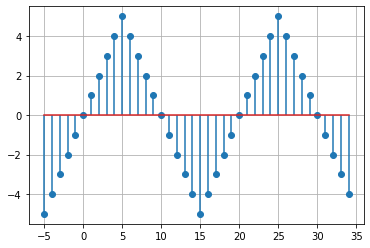

In [33]:
def impulse_train(n):
    return 1

n = np.arange(-5,35)
# Wave for 1 period of 20 units(-5 to 15)
tri_wave = [i*impulse_train(i) for i in range(-5,6)] + [(10-i)*impulse_train(i) for i in range(6,15)] 

plt.stem(n,tri_wave*2)
plt.grid()

# 3. LTI Systems

## 3.1

In [34]:
# Convolution function 
def conv_func(x_n,h_n):
    l1 = len(x_n)
    l2 = len(h_n)
    n = l1 + l2 - 1
    
    y=np.zeros(n)
    
    for i in range(n):   
        for k in range(l1):
            if(i-k < 0 or  (i-k)>=l2):
                y[i] += 0
            else:
                y[i] += x_n[k]*h_n[i-k]
    return y

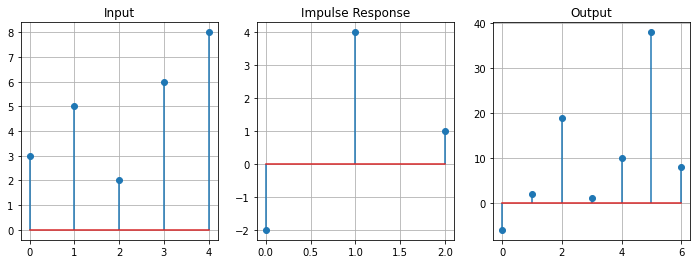

In [35]:
x1 = [3,5,2,6,8] 
h1 = [-2,4,1]
y1= conv_func(x1,h1)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].stem(np.arange(len(x1)), x1)
axes[0].set_title("Input")
axes[0].grid()

axes[1].stem(np.arange(len(h1)),h1)
axes[1].set_title("Impulse Response")
axes[1].grid()

axes[2].stem(np.arange(len(y1)),y1)
axes[2].set_title("Output")
axes[2].grid()


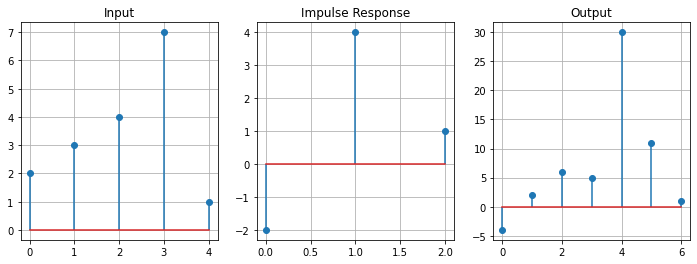

In [36]:
x2 = [2,3,4,7,1] 
h2 = [-2,4,1]
y2= conv_func(x2,h2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].stem(np.arange(len(x2)), x2)
axes[0].set_title("Input")
axes[0].grid()

axes[1].stem(np.arange(len(h2)),h2)
axes[1].axis('tight')
axes[1].set_title("Impulse Response")
axes[1].grid()

axes[2].stem(np.arange(len(y2)),y2)
axes[2].set_title("Output")
axes[2].grid()

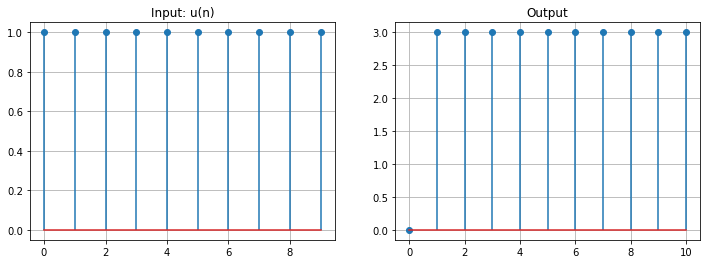

In [37]:
# Impulse Response y(n) = 3x(n-1) --> 3delta(n-1) = [0, 3, 0, 0, ...]

h = [0,3]

# Input: Unit Step function
x1 = [1 for i in range(10)]
y1 = np.convolve(x1,h)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(np.arange(len(x1)), x1)
axes[0].set_title("Input: u(n)")
axes[0].grid()

axes[1].stem(np.arange(len(y1)),y1)
axes[1].set_title("Output")
axes[1].grid()

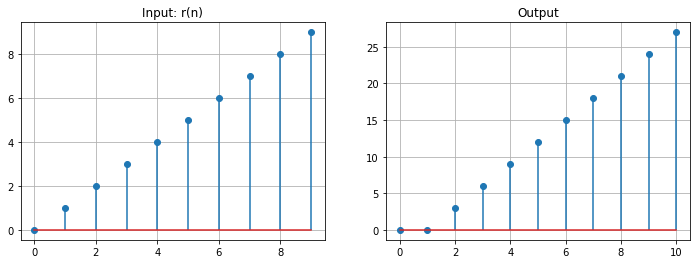

In [38]:
# Input: Ramp function
x2 = [i for i in range(10)]
y2 = np.convolve(x2,h)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(np.arange(len(x2)), x2)
axes[0].set_title("Input: r(n)")
axes[0].grid()

axes[1].stem(np.arange(len(y2)),y2)
axes[1].set_title("Output")
axes[1].grid()

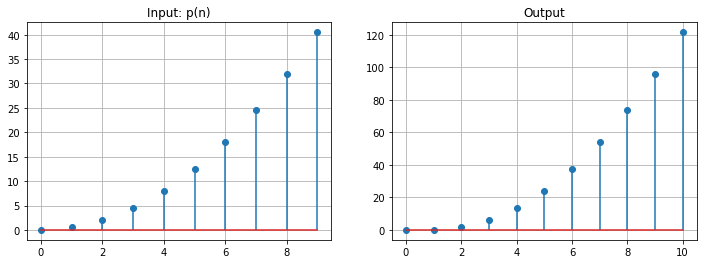

In [39]:
# Input: Parabolic function
x3 = [i*i/2 for i in range(10)]
y3 = np.convolve(x3,h)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(np.arange(len(x3)), x3)
axes[0].set_title("Input: p(n)")
axes[0].grid()

axes[1].stem(np.arange(len(y3)),y3)
axes[1].set_title("Output")
axes[1].grid()

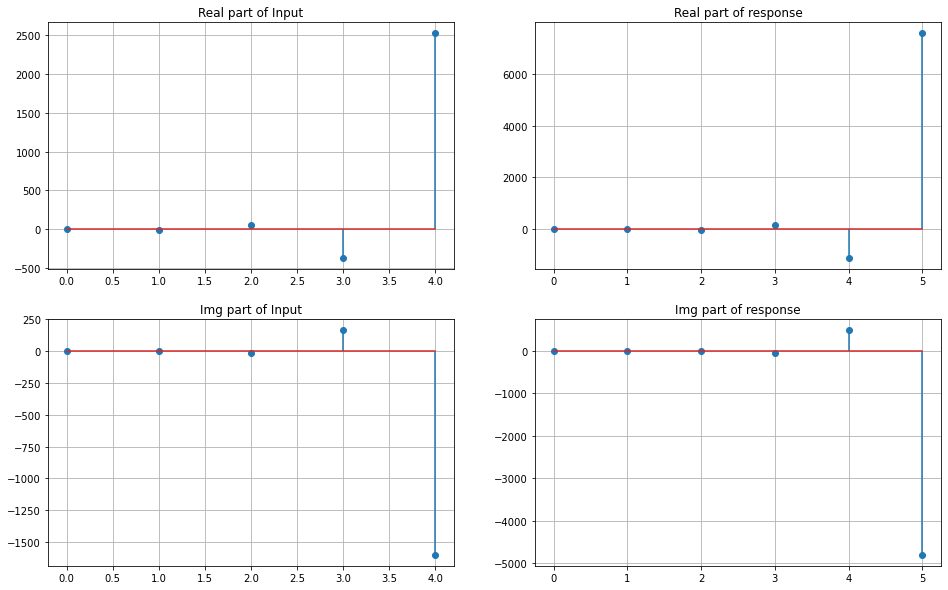

In [40]:
# Input: Complex Exp exp(2+3j)n
x4_real = [np.exp(2*i)*(np.cos(3*i)) for i in range(5)]
x4_img = [np.exp(2*i)*(np.sin(3*i)) for i in range(5)]
y4_real = np.convolve(x4_real,h)
y4_img = np.convolve(x4_img,h)

fig, axes = plt.subplots(2, 2, figsize=(16,10))

axes[0][0].stem(np.arange(len(x4_real)), x4_real)
axes[0][0].set_title("Real part of Input")
axes[0][0].grid()
axes[0][1].stem(np.arange(len(y4_real)), y4_real)
axes[0][1].set_title("Real part of response")
axes[0][1].grid()

axes[1][0].stem(np.arange(len(x4_img)), x4_img)
axes[1][0].set_title("Img part of Input")
axes[1][0].grid()
axes[1][1].stem(np.arange(len(y4_img)),y4_img)
axes[1][1].set_title("Img part of response")
axes[1][1].grid()

## 3.2

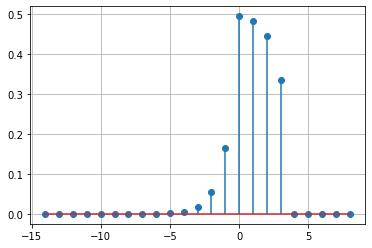

In [41]:
# x(n) = (1/3)^-n * u(-n-1)
# h(n) = u(n-1)

def unit_step(n):
    if(n>=0):
        return 1
    else:
        return 0

n = np.arange(-7,5)
x = [( (1/3)**(-i) )*unit_step(-i-1) for i in n]
h = [unit_step(i-1) for i in n]

y = conv_func(x,h)
nn = [i for i in range(-14,9)]
plt.stem(nn,conv_func(x,h))
plt.grid()

## 3.3

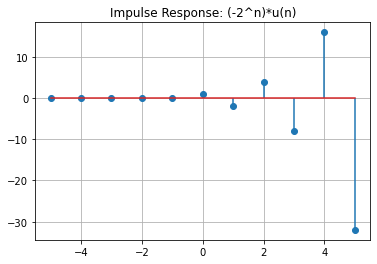

In [42]:
# y(n) + 2y(n-1) = x(n)
# for impulse response x(n)=delta(n)

def delta_fn(n):
    if(n==0):
        return 1
    else:
        return 0
n = np.arange(-5,6)
x = [delta_fn(i) for i in n] # x(n)=0 for n<0
y = np.zeros(len(n))

for i in n:
    if(i<0):
        y[i+5]=0
    else:
        y[i+5] = x[i+5] - 2*y[i+5-1]

    
plt.stem(n,y)
plt.title("Impulse Response: (-2^n)*u(n)")
plt.grid()

## 3.4

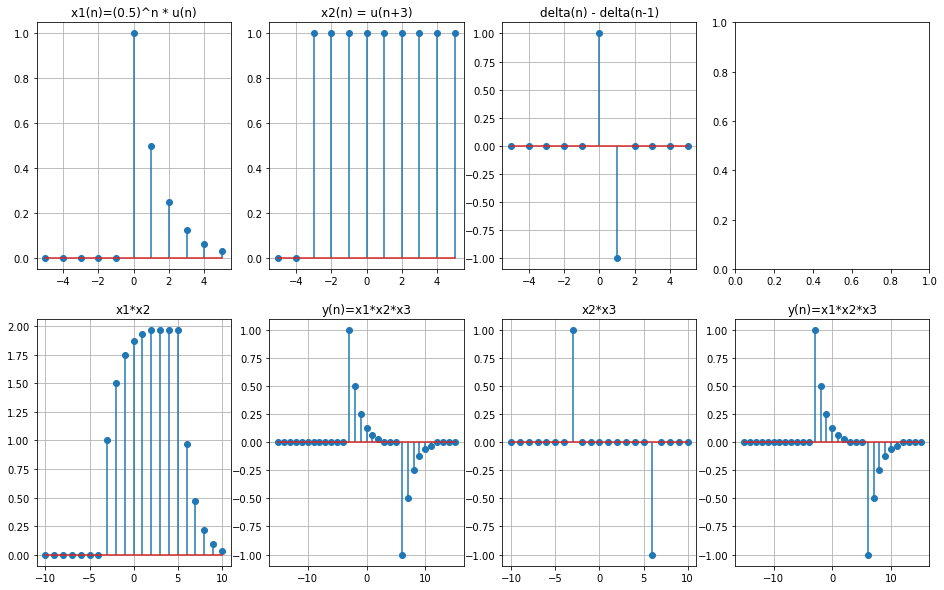

In [43]:
# x1(n) = (0.5)^n * u(n)
# x2(n) = u(n+3)
# x3(n) = delta(n) - delta(n-1)

def delta_fn(i):
    if(i==0):
        return 1
    else:
        return 0

n = np.arange(-5,6)
# x1,x2,x3 lies between [-5,5]
x1 = [(0.5**i)*unit_step(i) for i in n] 
x2 = [unit_step(i+3) for i in n]
x3 = [delta_fn(i)-delta_fn(i-1) for i in n]

n1 = n3 = [i for i in range(-10,11)]
n2 = n4 = [i for i in range(-15,16)]
y1 = conv_func(x1,x2) # between [-10,10]
y2 = conv_func(y1,x3) # between [-15,15]
y3 = conv_func(x2,x3) # between [-10,10]
y4 = conv_func(y3,x1) # # between [-15,15]

fig, axes = plt.subplots(2, 4, figsize=(16,10))

axes[0][0].stem(n, x1)
axes[0][0].set_title("x1(n)=(0.5)^n * u(n)")
axes[0][0].grid()
axes[0][1].stem(n, x2)
axes[0][1].set_title("x2(n) = u(n+3)")
axes[0][1].grid()
axes[0][2].stem(n, x3)
axes[0][2].set_title("delta(n) - delta(n-1)")
axes[0][2].grid()

axes[1][0].stem(n1,y1)
axes[1][0].set_title("x1*x2")
axes[1][0].grid()
axes[1][1].stem(n2,y2)
axes[1][1].set_title("y(n)=x1*x2*x3")
axes[1][1].grid()
axes[1][2].stem(n3,y3)
axes[1][2].set_title("x2*x3")
axes[1][2].grid()
axes[1][3].stem(n4,y4)
axes[1][3].set_title("y(n)=x1*x2*x3")
axes[1][3].grid()